### Introduction

Loan Prediction is one of the classic problems in machine learning .

In this problem, a dataset has been used as training and test data, and another dataset for the final analysis of the extracted model.
The point of importance is that these two datasets have "Missing Value(s)". In other words, some records do not have certain value for one or more features.

In previous implementations , the "Missing Values"  are calculated using methods such as (median) and (mean), but I have tried to obtain these values by using machine learning algorithms as follows : Linear Regrssion, Logistic Regression and kNN.

Finally, we apply the full dataset obtained, by using basic algorithms .

### Implementation

For start, we need these libraries:

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let's look at the data we have:

In [2]:
data = pd.read_csv('loan_dataset/train_u6lujuX_CVtuZ9i.csv')
print(f'Features: {data.shape[1]}')
print(f'Records: {data.shape[0]}')

Features: 13
Records: 614


As you can see , our dataset has 614 records and 13 features, But we don't need feature "Loan_ID" because it's unique. So we'll drop it at future.

lets look at deeper:

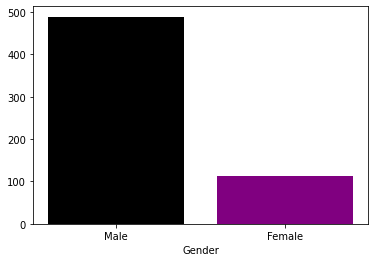

In [3]:
gender = data['Gender'].value_counts()
male_count = gender[0]
female_count = gender[1]
plt.bar(['Male', 'Female'], [male_count, female_count], color=['black', 'purple'])
plt.xlabel('Gender')
plt.show()

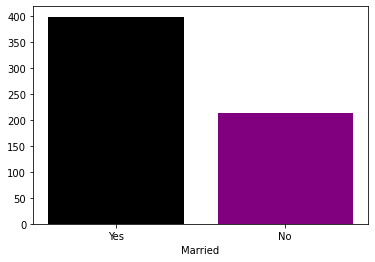

In [4]:
married = data['Married'].value_counts()
yes_count = married[0]
no_count = married[1]
plt.bar(['Yes', 'No'], [yes_count, no_count], color=['black', 'purple'])
plt.xlabel('Married')
plt.show()

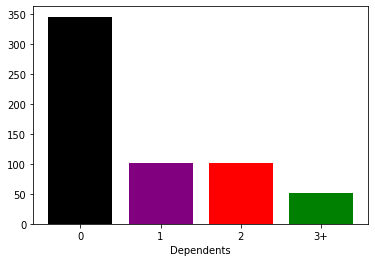

In [5]:
dependents = data['Dependents'].value_counts()
zero_count = dependents[0]
one_count = dependents[1]
two_count = dependents[2]
three_bigger_count = dependents[3]
plt.bar(['0', '1', '2', '3+'], [zero_count, one_count, two_count, three_bigger_count], color=['black', 'purple', 'red', 'green'])
plt.xlabel('Dependents')
plt.show()

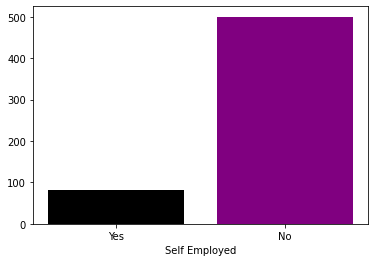

In [6]:
self_employed = data['Self_Employed'].value_counts()
yes_count = self_employed[1]
no_count = self_employed[0]
plt.bar(['Yes', 'No'], [yes_count, no_count], color=['black', 'purple'])
plt.xlabel('Self Employed')
plt.show()

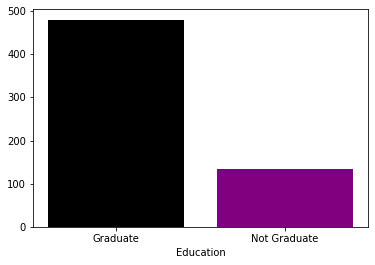

In [7]:
education = data['Education'].value_counts()
graduate_count = education[0]
not_graduate_count = education[1]
plt.bar(['Graduate', 'Not Graduate'], [graduate_count, not_graduate_count], color=['black', 'purple'])
plt.xlabel('Education')
plt.show()

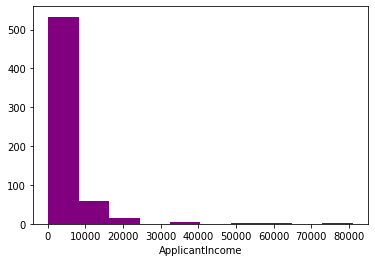

In [8]:
applicant_income = data['ApplicantIncome']
plt.hist(applicant_income, color='purple')
plt.xlabel('ApplicantIncome')
plt.show()

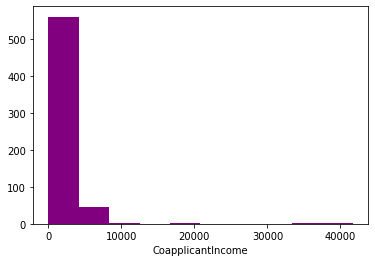

In [9]:
co_applicant_income = data['CoapplicantIncome']
plt.hist(co_applicant_income, color='purple')
plt.xlabel('CoapplicantIncome')
plt.show()

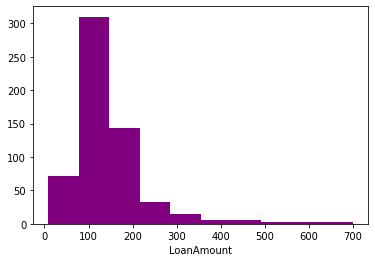

In [163]:
loan_amount = data['LoanAmount']
plt.hist(loan_amount, color='purple')
plt.xlabel('LoanAmount')
plt.show()

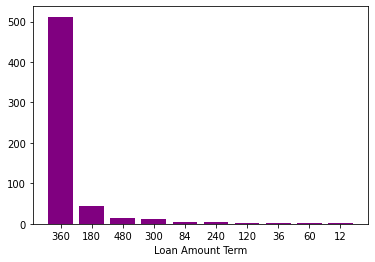

In [11]:
loan_amount_term = data['Loan_Amount_Term']
x_axis = ['360', '180', '480', '300', '84', '240', '120', '36', '60', '12']
for i in range(0, 10):
    plt.bar(x_axis[i], loan_amount_term.value_counts().tolist()[i], color='purple')
plt.xlabel('Loan Amount Term')
plt.show()

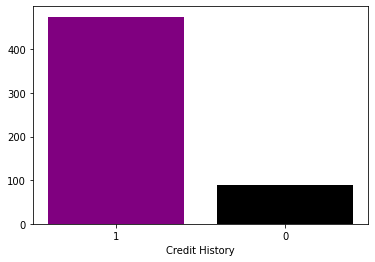

In [12]:
credit_history = data['Credit_History']
one_count = credit_history.value_counts()[1]
zero_count = credit_history.value_counts()[0]
plt.bar(['1', '0'], [one_count, zero_count], color=['purple', 'black'])
plt.xlabel('Credit History')
plt.show()

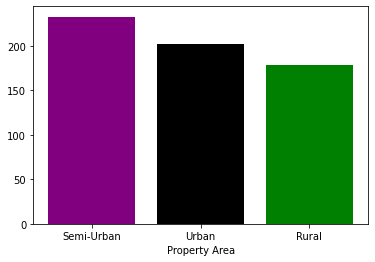

In [13]:
property_area = data['Property_Area']
semi_urban = property_area.value_counts()['Semiurban']
urban = property_area.value_counts()['Urban']
rural = property_area.value_counts()['Rural']
plt.bar(['Semi-Urban', 'Urban', 'Rural'], [semi_urban, urban, rural], color=['purple', 'black', 'green'])
plt.xlabel('Property Area')
plt.show()

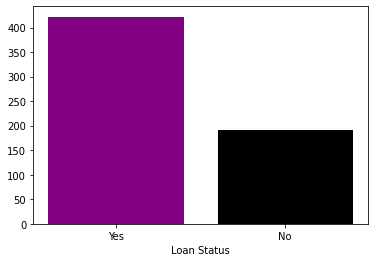

In [14]:
loan_status = data['Loan_Status']
yes_count = loan_status.value_counts()['Y']
no_count = loan_status.value_counts()['N']
plt.bar(['Yes', 'No'], [yes_count, no_count], color=['purple', 'black'])
plt.xlabel('Loan Status')
plt.show()

Now we know what we have exactly!

### Label-Encoding

to use some machine learning algorithms (such as knn), we need to change non-numerical values to numerical.
So we should do this steps:

At first, we drop 'Loan_ID' because it's unique...

In [15]:
data = data.drop(columns=['Loan_ID'])

In [16]:
numerical_data = data.replace(to_replace=['Male', 'Female', 'No', 'Yes', '3+', 'Not Graduate', 'Graduate', 'Urban', 'Rural', 'Semiurban', 'N', 'Y'], value=[0.0, 1.0, 0.0, 1.0, 3.0, 0.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0])

### Normalization

Now it's time to get dumb with the normalization! - (Emmure - (F)inally (U)nderstanding (N)othing)

In [17]:
from sklearn.preprocessing import minmax_scale

In [18]:
numerical_data['CoapplicantIncome'] = minmax_scale(numerical_data['CoapplicantIncome'])
numerical_data['ApplicantIncome'] = minmax_scale(numerical_data['ApplicantIncome'])
numerical_data['LoanAmount'] = minmax_scale(numerical_data['LoanAmount'])

It's better to save 'numerical_data':

In [19]:
numerical_data.to_csv('Numerical_Data.csv')

In [20]:
def get_missing_values(numerical_data):
    count_nan = 0
    
    indexes_without_nan = list()
    indexes_one_nan = list()
    indexes_two_nan = list()
    indexes_three_nan = list()
    
    for iteration in range(len(numerical_data)):
        for column in numerical_data.columns.tolist():
            if str(numerical_data.loc[iteration, column]) == 'nan': count_nan += 1

        if count_nan == 0:
            indexes_without_nan.append(iteration)

        if count_nan == 1:
            indexes_one_nan.append(iteration)

        if count_nan == 2:
            indexes_two_nan.append(iteration)
            
        if count_nan == 3:
            indexes_three_nan.append(iteration)
            
        count_nan = 0
        
        
    yield np.array(indexes_without_nan)
    yield np.array(indexes_one_nan)
    yield np.array(indexes_two_nan)
    yield np.array(indexes_three_nan)

In [21]:
missing_values = list(get_missing_values(numerical_data))

without_miss = missing_values[0]
one_miss = missing_values[1]
two_miss = missing_values[2]
three_miss = missing_values[3]

print(f'Records without Missing-Value: {len(without_miss)}')
print(f'Records with one Missing-Value: {len(one_miss)} ')
print(f'Records with two Missing-Value: {len(two_miss)} ')
print(f'Records with three Missing-Value: {len(three_miss)} ')

Records without Missing-Value: 480
Records with one Missing-Value: 121 
Records with two Missing-Value: 11 
Records with three Missing-Value: 2 


We'll use 480 records to fill each field in records with one Missing-Value

#### Gender:

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
data_without_miss_value = numerical_data.loc[without_miss]
gender_index_with_miss = list()

for iteration in one_miss:
    if str(numerical_data['Gender'][iteration]) == 'nan':
        gender_index_with_miss.append(iteration)
        
train_labels = data_without_miss_value.loc[:, 'Gender']
train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=['Gender'])
test_features = numerical_data.loc[gender_index_with_miss, 'Gender':'Loan_Status'].drop(columns=['Gender'])

model = LogisticRegression(max_iter=5000)
model.fit(train_features, train_labels)
pred = model.predict(test_features)

print(f'Gender with miss value: {gender_index_with_miss}')
print(f'Predicted: {pred}')

numerical_data.loc[gender_index_with_miss, 'Gender'] = pred

Gender with miss value: [23, 126, 171, 188, 314, 334, 467, 477, 507, 576, 588, 592]
Predicted: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Now we have:

In [24]:
missing_values = list(get_missing_values(numerical_data))

without_miss = missing_values[0]
one_miss = missing_values[1]
two_miss = missing_values[2]
three_miss = missing_values[3]

print(f'Records without Missing-Value: {len(without_miss)}')
print(f'Records with one Missing-Value: {len(one_miss)} ')
print(f'Records with two Missing-Value: {len(two_miss)} ')
print(f'Records with three Missing-Value: {len(three_miss)} ')

Records without Missing-Value: 492
Records with one Missing-Value: 109 
Records with two Missing-Value: 11 
Records with three Missing-Value: 2 


In [25]:
print(numerical_data.loc[one_miss, 'Married'].hasnans)

False


#### Dependents:

For feature 'Dependents' we use (DecisionTree) to find missing-values...

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [27]:
data_without_miss_value = numerical_data.loc[without_miss]
dependents_index_with_miss = list()

for iteration in one_miss:
    if str(numerical_data['Dependents'][iteration]) == 'nan':
        dependents_index_with_miss.append(iteration)
                
train_labels = data_without_miss_value.loc[:, 'Dependents'].astype(float)
train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=['Dependents']).astype(float)
test_features = numerical_data.loc[dependents_index_with_miss, 'Gender':'Loan_Status'].drop(columns=['Dependents']).astype(float)

model = DecisionTreeClassifier()
model.fit(train_features, train_labels)
pred = model.predict(test_features)

print(f'Dependents with miss value: {dependents_index_with_miss}')
print(f'Predicted: {pred}')

numerical_data.loc[dependents_index_with_miss, 'Dependents'] = pred

Dependents with miss value: [120, 226, 293, 301, 332, 346, 355, 517, 571, 597]
Predicted: [0. 2. 2. 1. 0. 0. 1. 2. 1. 2.]


In [28]:
missing_values = list(get_missing_values(numerical_data))

without_miss = missing_values[0]
one_miss = missing_values[1]
two_miss = missing_values[2]
three_miss = missing_values[3]

print(f'Records without Missing-Value: {len(without_miss)}')
print(f'Records with one Missing-Value: {len(one_miss)} ')
print(f'Records with two Missing-Value: {len(two_miss)} ')
print(f'Records with three Missing-Value: {len(three_miss)} ')

Records without Missing-Value: 502
Records with one Missing-Value: 99 
Records with two Missing-Value: 11 
Records with three Missing-Value: 2 


#### Self-Employed:

In [29]:
data_without_miss_value = numerical_data.loc[without_miss]
self_employed_index_with_miss = list()

for iteration in one_miss:
    if str(numerical_data['Self_Employed'][iteration]) == 'nan':
        self_employed_index_with_miss.append(iteration)
                
train_labels = pd.to_numeric(data_without_miss_value.loc[:, 'Self_Employed'])
train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=['Self_Employed'])
test_features = numerical_data.loc[self_employed_index_with_miss, 'Gender':'Loan_Status'].drop(columns=['Self_Employed'])

model = LogisticRegression(max_iter=5000)
model.fit(train_features, train_labels)
pred = model.predict(test_features)

print(f'Self_Employed with miss value: {self_employed_index_with_miss}')
print(f'Predicted: {pred}')

numerical_data.loc[self_employed_index_with_miss, 'Self_Employed'] = pred

Self_Employed with miss value: [11, 29, 107, 111, 114, 158, 170, 218, 231, 268, 295, 333, 336, 344, 374, 380, 385, 432, 447, 463, 468, 535, 542, 579, 601]
Predicted: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [30]:
missing_values = list(get_missing_values(numerical_data))

without_miss = missing_values[0]
one_miss = missing_values[1]
two_miss = missing_values[2]
three_miss = missing_values[3]

print(f'Records without Missing-Value: {len(without_miss)}')
print(f'Records with one Missing-Value: {len(one_miss)} ')
print(f'Records with two Missing-Value: {len(two_miss)} ')
print(f'Records with three Missing-Value: {len(three_miss)} ')

Records without Missing-Value: 527
Records with one Missing-Value: 74 
Records with two Missing-Value: 11 
Records with three Missing-Value: 2 


#### LoanAmount:

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
data_without_miss_value = numerical_data.loc[without_miss]
loan_amount_index_with_miss = list()

for iteration in one_miss:
    if str(numerical_data['LoanAmount'][iteration]) == 'nan':
        loan_amount_index_with_miss.append(iteration)
                
train_labels = pd.to_numeric(data_without_miss_value.loc[:, 'LoanAmount'])
train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=['LoanAmount'])
test_features = numerical_data.loc[loan_amount_index_with_miss, 'Gender':'Loan_Status'].drop(columns=['LoanAmount'])

model = LinearRegression()
model.fit(train_features, train_labels)
pred = model.predict(test_features)

print(f'LoanAmount with miss value: {loan_amount_index_with_miss}')
print(f'Predicted: {pred}')

numerical_data.loc[loan_amount_index_with_miss, 'LoanAmount'] = pred

LoanAmount with miss value: [0, 35, 63, 81, 103, 113, 127, 202, 284, 305, 322, 338, 387, 437, 479, 524, 550, 551, 605]
Predicted: [0.15769    0.16436268 0.19608316 0.18024016 0.21982382 0.20681084
 0.15999129 0.16025466 0.36562285 0.10672039 0.17559066 0.12148722
 0.16482668 0.15414958 0.20234522 0.19632975 0.23552225 0.16172975
 0.15210112]


In [33]:
missing_values = list(get_missing_values(numerical_data))

without_miss = missing_values[0]
one_miss = missing_values[1]
two_miss = missing_values[2]
three_miss = missing_values[3]

print(f'Records without Missing-Value: {len(without_miss)}')
print(f'Records with one Missing-Value: {len(one_miss)} ')
print(f'Records with two Missing-Value: {len(two_miss)} ')
print(f'Records with three Missing-Value: {len(three_miss)} ')

Records without Missing-Value: 546
Records with one Missing-Value: 55 
Records with two Missing-Value: 11 
Records with three Missing-Value: 2 


#### Loan_Amount_Term:

For field 'Loan_Amount_Term' we use (kNN):

In [34]:
data_without_miss_value = numerical_data.loc[without_miss]
loan_term_index_with_miss = list()

for iteration in one_miss:
    if str(numerical_data['Loan_Amount_Term'][iteration]) == 'nan':
        loan_term_index_with_miss.append(iteration)
                
train_labels = data_without_miss_value.loc[:, 'Loan_Amount_Term'].astype(float)
train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=['Loan_Amount_Term']).astype(float)
test_features = numerical_data.loc[loan_term_index_with_miss, 'Gender':'Loan_Status'].drop(columns=['Loan_Amount_Term']).astype(float)

model = KNeighborsClassifier(500)
model.fit(train_features, train_labels)
pred = model.predict(test_features)

print(f'Loan_Amount_Term with miss value: {loan_term_index_with_miss}')
print(f'Predicted: {pred}')

numerical_data.loc[loan_term_index_with_miss, 'Loan_Amount_Term'] = pred

Loan_Amount_Term with miss value: [36, 44, 45, 73, 112, 165, 197, 223, 232, 367, 421, 423]
Predicted: [360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.]


In [35]:
missing_values = list(get_missing_values(numerical_data))

without_miss = missing_values[0]
one_miss = missing_values[1]
two_miss = missing_values[2]
three_miss = missing_values[3]

print(f'Records without Missing-Value: {len(without_miss)}')
print(f'Records with one Missing-Value: {len(one_miss)} ')
print(f'Records with two Missing-Value: {len(two_miss)} ')
print(f'Records with three Missing-Value: {len(three_miss)} ')

Records without Missing-Value: 558
Records with one Missing-Value: 43 
Records with two Missing-Value: 11 
Records with three Missing-Value: 2 


#### Credit_History:

In [36]:
data_without_miss_value = numerical_data.loc[without_miss]
credit_index_with_miss = list()

for iteration in one_miss:
    if str(numerical_data['Credit_History'][iteration]) == 'nan':
        credit_index_with_miss.append(iteration)
                
train_labels = data_without_miss_value.loc[:, 'Credit_History'].astype(float)
train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=['Credit_History']).astype(float)
test_features = numerical_data.loc[credit_index_with_miss, 'Gender':'Loan_Status'].drop(columns=['Credit_History']).astype(float)

model = LogisticRegression(max_iter=5000)
model.fit(train_features, train_labels)
pred = model.predict(test_features)

print(f'Credit_History with miss value: {credit_index_with_miss}')
print(f'Predicted: {pred}')

numerical_data.loc[credit_index_with_miss, 'Credit_History'] = pred

Credit_History with miss value: [16, 42, 79, 83, 86, 117, 125, 129, 130, 156, 181, 187, 198, 219, 237, 259, 260, 279, 309, 313, 317, 318, 323, 348, 363, 377, 392, 395, 444, 449, 451, 473, 490, 491, 497, 503, 506, 530, 533, 544, 556, 565, 583]
Predicted: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [37]:
missing_values = list(get_missing_values(numerical_data))

without_miss = missing_values[0]
one_miss = missing_values[1]
two_miss = missing_values[2]
three_miss = missing_values[3]

print(f'Records without Missing-Value: {len(without_miss)}')
print(f'Records with one Missing-Value: {len(one_miss)} ')
print(f'Records with two Missing-Value: {len(two_miss)} ')
print(f'Records with three Missing-Value: {len(three_miss)} ')

Records without Missing-Value: 601
Records with one Missing-Value: 0 
Records with two Missing-Value: 11 
Records with three Missing-Value: 2 


#### Until now, we filled records that has one missing-value...

So we should go for records with two missing-values

In [38]:
numerical_data.loc[two_miss].isna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,False,False,False,False,True,False,False,False,True,False,False,False
24,False,False,False,False,True,False,False,False,False,True,False,False
30,False,False,False,False,True,False,False,False,False,True,False,False
102,False,False,True,False,False,False,False,True,False,False,False,False
104,False,True,True,False,False,False,False,False,False,False,False,False
228,False,True,True,False,False,False,False,False,False,False,False,False
236,False,False,False,False,True,False,False,False,False,True,False,False
335,False,False,True,False,False,False,False,False,True,False,False,False
411,False,False,False,False,True,False,False,False,False,True,False,False
460,True,False,False,False,False,False,False,False,False,True,False,False


In [120]:
for iteration in two_miss:
    columns = numerical_data.loc[two_miss].isna().loc[iteration][numerical_data.loc[two_miss].isna().loc[iteration].values == True].keys()
    for column in columns:
        
        if column == 'Gender' or column == 'Married' or column == 'Education' or column == 'Self_Employed' or column == 'Credit_History':

            train_labels = data_without_miss_value.loc[:, column].astype(float)
            train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=[i for i in columns]).astype(float)
            test_features = np.array(numerical_data.loc[iteration, 'Gender':'Loan_Status'].drop(labels=[i for i in columns]).astype(float)).reshape(1, -1)
            
            model = LogisticRegression(max_iter=5000)
            model.fit(train_features, train_labels)
            pred = model.predict(test_features)
            
            numerical_data.loc[iteration, column] = pred

        elif column == 'Dependents' or column == 'Property_Area' or column == 'Loan_Amount_Term':
            
            train_labels = data_without_miss_value.loc[:, column].astype(float)
            train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=[i for i in columns]).astype(float)
            test_features = np.array(numerical_data.loc[iteration, 'Gender':'Loan_Status'].drop(labels=[i for i in columns]).astype(float)).reshape(1, -1)

            model = KNeighborsClassifier(550)
            model.fit(train_features, train_labels)
            pred = model.predict(test_features)
            
            numerical_data.loc[iteration, column] = pred
            
        elif column == 'LoanAmount' or column == 'CoapplicantIncome' or column == 'ApplicantIncome':
            
            train_labels = data_without_miss_value.loc[:, column].astype(float)
            train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=[i for i in columns]).astype(float)
            test_features = np.array(numerical_data.loc[iteration, 'Gender':'Loan_Status'].drop(labels=[i for i in columns]).astype(float)).reshape(1, -1)

            model = LinearRegression()
            model.fit(train_features, train_labels)
            pred = model.predict(test_features)
            
            numerical_data.loc[iteration, column] = pred
            
        else:
            pass

In [124]:
missing_values = list(get_missing_values(numerical_data))

without_miss = missing_values[0]
one_miss = missing_values[1]
two_miss = missing_values[2]
three_miss = missing_values[3]

print(f'Records without Missing-Value: {len(without_miss)}')
print(f'Records with one Missing-Value: {len(one_miss)} ')
print(f'Records with two Missing-Value: {len(two_miss)} ')
print(f'Records with three Missing-Value: {len(three_miss)} ')

Records without Missing-Value: 612
Records with one Missing-Value: 0 
Records with two Missing-Value: 0 
Records with three Missing-Value: 2 


In [135]:
for iteration in three_miss:
    columns = numerical_data.loc[three_miss].isna().loc[iteration][numerical_data.loc[three_miss].isna().loc[iteration].values == True].keys()
    for column in columns:
        
        if column == 'Gender' or column == 'Married' or column == 'Education' or column == 'Self_Employed' or column == 'Credit_History':

            train_labels = data_without_miss_value.loc[:, column].astype(float)
            train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=[i for i in columns]).astype(float)
            test_features = np.array(numerical_data.loc[iteration, 'Gender':'Loan_Status'].drop(labels=[i for i in columns]).astype(float)).reshape(1, -1)
            
            model = LogisticRegression(max_iter=5000)
            model.fit(train_features, train_labels)
            pred = model.predict(test_features)
            
            numerical_data.loc[iteration, column] = pred

        elif column == 'Dependents' or column == 'Property_Area' or column == 'Loan_Amount_Term':
            
            train_labels = data_without_miss_value.loc[:, column].astype(float)
            train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=[i for i in columns]).astype(float)
            test_features = np.array(numerical_data.loc[iteration, 'Gender':'Loan_Status'].drop(labels=[i for i in columns]).astype(float)).reshape(1, -1)

            model = KNeighborsClassifier(550)
            model.fit(train_features, train_labels)
            pred = model.predict(test_features)
            
            numerical_data.loc[iteration, column] = pred
            
        elif column == 'LoanAmount' or column == 'CoapplicantIncome' or column == 'ApplicantIncome':
            
            train_labels = data_without_miss_value.loc[:, column].astype(float)
            train_features = data_without_miss_value.loc[:, 'Gender':'Loan_Status'].drop(columns=[i for i in columns]).astype(float)
            test_features = np.array(numerical_data.loc[iteration, 'Gender':'Loan_Status'].drop(labels=[i for i in columns]).astype(float)).reshape(1, -1)

            model = LinearRegression()
            model.fit(train_features, train_labels)
            pred = model.predict(test_features)
            
            numerical_data.loc[iteration, column] = pred
            
        else:
            pass

In [136]:
missing_values = list(get_missing_values(numerical_data))

without_miss = missing_values[0]
one_miss = missing_values[1]
two_miss = missing_values[2]
three_miss = missing_values[3]

print(f'Records without Missing-Value: {len(without_miss)}')
print(f'Records with one Missing-Value: {len(one_miss)} ')
print(f'Records with two Missing-Value: {len(two_miss)} ')
print(f'Records with three Missing-Value: {len(three_miss)} ')

Records without Missing-Value: 614
Records with one Missing-Value: 0 
Records with two Missing-Value: 0 
Records with three Missing-Value: 0 


In [138]:
from sklearn.model_selection import cross_val_score

### Cross-Validation

In [160]:
y = numerical_data.loc[:, 'Loan_Status']
X = numerical_data.loc[:, 'Gender':'Loan_Status'].drop(columns=['Loan_Status'])


tree_score_mean = cross_val_score(DecisionTreeClassifier(), X, y, cv=10).mean()
knn_score_mean = cross_val_score(KNeighborsClassifier(300), X, y, cv=10).mean()
logistic_score_mean = cross_val_score(LogisticRegression(max_iter=5000), X, y, cv=10).mean()
svm_score_mean = cross_val_score(SVC(), X, y, cv=10).mean()

DecisionTree: 0.6939978847170809
k-NN: 0.6873083024854575
LogisticRegression: 0.8112374405076679
SVM: 0.6873083024854575


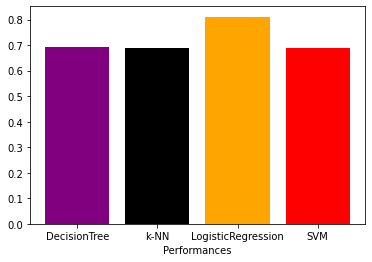

In [165]:
plt.bar(x=['DecisionTree', 'k-NN', 'LogisticRegression', 'SVM'], height=[tree_score_mean, knn_score_mean, logistic_score_mean, svm_score_mean], color=['purple', 'black', 'orange', 'red'])
plt.xlabel('Performances')

print(f'DecisionTree: {tree_score_mean}')
print(f'k-NN: {knn_score_mean}')
print(f'LogisticRegression: {logistic_score_mean}')
print(f'SVM: {svm_score_mean}')

#### If this implementation was helpful, please up-vote me!